In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('SalaryData_Train.csv')

In [3]:
test=pd.read_csv('SalaryData_Test.csv')

In [4]:
train.shape,test.shape

((30161, 14), (15060, 14))

In [5]:
train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [7]:
train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [8]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [9]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
    train[i] = number.fit_transform(train[i])
    test[i] = number.fit_transform(test[i])

In [10]:
train.shape

(30161, 14)

In [11]:
train_y=train['Salary']
train_x=train.drop(['Salary'],axis=1)

In [13]:
test_y=test['Salary']
test_x=test.drop(['Salary'],axis=1)

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
g=GaussianNB()

In [17]:
m=MultinomialNB()

In [18]:
g.fit(train_x,train_y)

GaussianNB(priors=None)

In [19]:
g.score(train_x,train_y)

0.7953317197705646

In [22]:
g.score(test_x,test_y)

0.7946879150066402

In [21]:
ypred=g.predict(test_x)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(test_y,ypred)

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

In [28]:
m.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
m.score(train_x,train_y)#Gaussian better

0.7729186698053778

In [31]:
m.score(test_x,test_y)

0.7749667994687915

# Sms ham-spam

In [36]:
df=pd.read_csv('sms_raw_NB.csv',encoding='latin-1')

In [37]:
df.shape

(5559, 2)

In [38]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


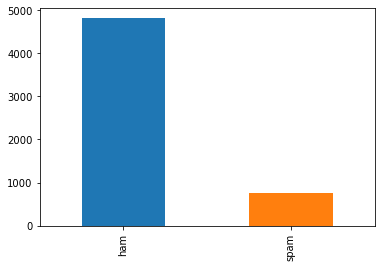

In [40]:
df['type'].value_counts().plot(kind='bar')

In [41]:
df.columns

Index(['type', 'text'], dtype='object')

In [42]:
df['len_text']=df['text'].apply(len)

In [49]:
df['len_text'].head()

0     49
1     23
2     43
3    150
4    161
Name: len_text, dtype: int64

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf=TfidfVectorizer(stop_words='english',max_features=1000)

In [52]:
X=tfidf.fit_transform(df['text'])

In [53]:
X.shape

(5559, 1000)

In [54]:
df['type'].shape

(5559,)

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,df['type'],test_size=0.2,random_state=1001)

In [58]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4447, 1000), (1112, 1000), (4447,), (1112,))

In [59]:
m=MultinomialNB()

In [60]:
m.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
m.score(x_train,y_train)

0.9822352147515179

In [62]:
ypred=m.predict(x_test)

In [63]:
m.score(x_test,y_test)

0.9811151079136691

In [64]:
pd.crosstab(ypred,y_test)

type,ham,spam
row_0,,
ham,963,18
spam,3,128


In [70]:
m.predict(x_test[4])

array(['spam'], dtype='<U4')

In [69]:
y_test.head(5)

5254     ham
548      ham
32       ham
2073     ham
5474    spam
Name: type, dtype: object